Êï∞ÊçÆÂèØËßÜÂåñ

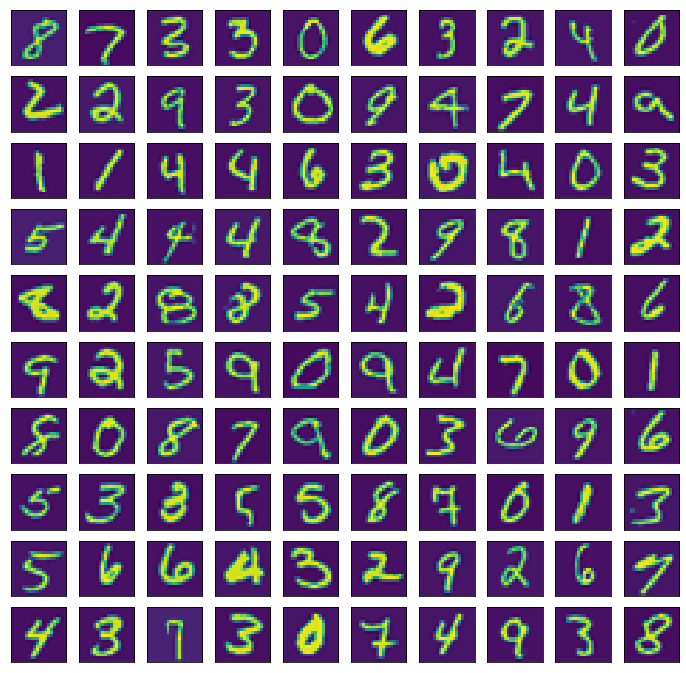

In [185]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
X = loadmat('ex3data1.mat')['X']
y = loadmat('ex3data1.mat')['y']
img_idx = np.random.choice(X.shape[0], size=100, replace=False)
img = X[img_idx]
fig, ax_array = plt.subplots(nrows=10, ncols=10, figsize=(12, 12), sharex=True, sharey=True)
for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(img[10*r+c].reshape(20, 20).T)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

ÂèåÊç£Èºì‰∫Ü‰∏ÄÂ§©ÔºåËøòÊòØ‰∏çÁÜüÊÇâpythonÂïäo_OÔºågradË¢´ËµãÂÄºÁü©ÈòµÂêéË¶ÅÁî®grad[0, 0]Ôºå‰ΩÜÊàëÁî®‰∫Ügrad[0]‚Ä¶‚Ä¶,üòîÔºå‰∏çËøáÊúÄÂêéËøòÊòØË∞ÉÂ•Ω‰∫ÜÔºåÂºÄÂøÉ^-^ÔºåÂáÜÁ°ÆÁéá0.9446ÔºåÊØî‰∏ãÈù¢ÁöÑÁ•ûÁªèÁΩëÁªúË¶ÅÂ∑Æ‰∫õ„ÄÇ

In [2]:
from scipy.io import loadmat
import scipy.optimize as opt 
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cost(theta, X, y, lam):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    A = sigmoid(X@theta.T)
    B = np.multiply(-y, np.log(A))
    C = np.multiply(-(1-y), np.log(1-A))
    reg = (lam/(2*X.shape[0]))*np.sum(np.power(theta[0,1:],2))
    cost = np.sum(B+C)/X.shape[0]+reg
    return cost

def gradient(theta, X, y, lam):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    A = sigmoid(X@theta.T)
    grad = (A-y).T@X/X.shape[0]+(lam/X.shape[0])*theta
    grad[0, 0] = np.sum(np.multiply(A-y, X[:, 0:1]))/X.shape[0]
    return grad

def predict(theta, X, y):
#     print(np.sum(sigmoid(X@theta.T), axis=1))
    res = np.argmax(X@theta.T, axis=1)+1
    cnt = 0
    for i in range(y.shape[0]):
        if (res[i] == y[i]):
            cnt += 1
    return cnt/y.shape[0]

X = np.insert(loadmat('ex3data1.mat')['X'], 0, values=1, axis=1)
y = loadmat('ex3data1.mat')['y']
lam = 1

Y = np.matrix([[1 if (y[j] == i) else 0 for j in range(y.shape[0])] for i in range(1, 11)])
result = np.array([opt.minimize(fun=cost, x0=np.zeros((1, X.shape[1])), args=(X, Y[i].T, lam), method='TNC', jac=gradient).x for i in range(0, 10)])
print(predict(result, X, y))

[0.99983111 1.00795807 1.02406195 ... 0.98389806 0.99497769 0.5498238 ]
0.9446


Áî®FPÁ•ûÁªèÁΩëÁªúÂÅö‰∏Ä‰∏ãÂàÜÁ±ªÔºåÂáÜÁ°ÆÁéá0.9752

In [63]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
def sigmoid(x):
    return 1/(1+np.exp(-x))

X = loadmat('ex3data1.mat')['X']
y = loadmat('ex3data1.mat')['y']
theta1 = loadmat('ex3weights.mat')['Theta1']
theta2 = loadmat('ex3weights.mat')['Theta2']
X = np.insert(X, 0, values=1, axis=1)
a2 = X@theta1.T
a2 = np.insert(sigmoid(a2), 0, values=1, axis=1)
a3 = sigmoid(a2@theta2.T)

tot = []
for i in range(1, 11):
    tot.append(len(y[y == i]))
    
a3 = np.argmax(a3, axis=1)+1
for i in range(len(a3)):
    if (a3[i] == y[i]):
        tot[a3[i]-1] -= 1
print(pd.DataFrame((500-np.array(tot))/500))

       0
0  0.982
1  0.970
2  0.960
3  0.968
4  0.984
5  0.986
6  0.970
7  0.982
8  0.958
9  0.992
